In [6]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
dataset = pd.read_csv('/content/uam_Sentiment.csv')

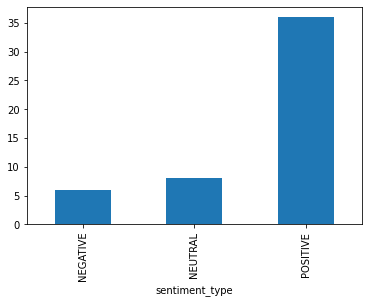

In [9]:
dataset.groupby('sentiment_type').content.count().plot.bar(ylim=0)
plt.show()

In [10]:
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
dataset['cleaned'] = dataset['content'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

(50, 118)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
X = dataset['cleaned']
Y = dataset['sentiment_type']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
vectorizer.get_feature_names()
X.toarray()  

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Naive Bayes Model

In [13]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
mnb=MultinomialNB()
model = mnb.fit(X_train, y_train)
ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
print("Classification Report:\n", classification_report(ytest, model.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(ytest, model.predict(X_test)))

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         1
     NEUTRAL       0.00      0.00      0.00         1
    POSITIVE       0.78      0.64      0.70        11

    accuracy                           0.54        13
   macro avg       0.26      0.21      0.23        13
weighted avg       0.66      0.54      0.59        13

Confusion Matrix:
 [[0 0 1]
 [0 0 1]
 [1 3 7]]


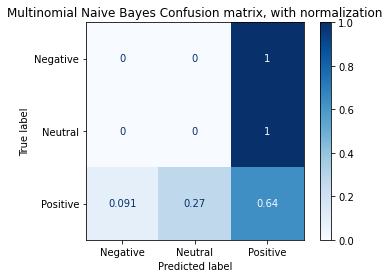

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(mnb, X_test, ytest,
                                 display_labels=['Negative', 'Neutral', 'Positive'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Multinomial Naive Bayes Confusion matrix, with normalization');

Linear Discriminant Analysis

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# create the lda model
lda_clf = LinearDiscriminantAnalysis()

In [17]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [ ]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
lda_clf = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape
from sklearn.feature_extraction.text import CountVectorizer
X = dataset['cleaned']
Y = dataset['sentiment_type']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
vectorizer.get_feature_names()
X.toarray()  
model1= lda_clf.fit(X_train.todense(), y_train)
ytest = np.array(y_test)
print("Classification Report:\n", classification_report(ytest, model1.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(ytest, model1.predict(X_test)))

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.00      0.00      0.00         1
     NEUTRAL       0.00      0.00      0.00         1
    POSITIVE       0.85      1.00      0.92        11

    accuracy                           0.85        13
   macro avg       0.28      0.33      0.31        13
weighted avg       0.72      0.85      0.78        13

Confusion Matrix:
 [[ 0  0  1]
 [ 0  0  1]
 [ 0  0 11]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


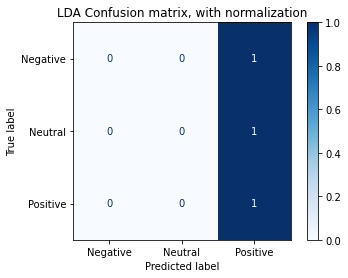

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(model1, X_test, ytest,
                                 display_labels=['Negative', 'Neutral', 'Positive'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('LDA Confusion matrix, with normalization');